In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
wrs = pd.read_csv('../Capstone_csv_file/wrs_yds_rec_salary_17-18')

In [3]:
wrs.dtypes

NAME             object
YDS/REC         float64
YDS/REC_rank    float64
salary            int64
dtype: object

In [4]:
wrs.head()

,NAME,YDS/REC,YDS/REC_rank,salary
0,Marquise Goodwin,325.2,1.0,3000000
1,Marvin Jones,306.5,2.0,8000000
2,Brandin Cooks,278.3,3.0,2095863
3,Julio Jones,260.2,5.0,14251209
4,Paul Richardson,253.6,6.0,1178209


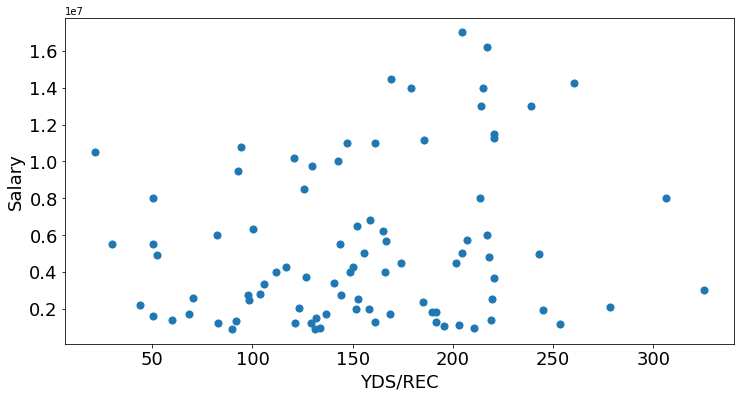

In [5]:
ax = wrs.plot(kind="scatter", x = 'YDS/REC',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('YDS/REC', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(wrs.loc[:, ['YDS/REC', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 3.06268421e-17, -7.65671051e-18])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.16754085, -0.47989818],
       [ 0.88470649,  1.9685636 ],
       [-0.76107235,  1.01125915],
       [-1.30471811, -0.5810226 ],
       [ 1.09268715, -0.47838354]])

In [11]:
km.predict(X)

array([4, 4, 4, 1, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4, 1, 4, 1, 1, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2],
      dtype=int32)

In [12]:
wrs['clusters'] = km.labels_
wrs.head()

,NAME,YDS/REC,YDS/REC_rank,salary,clusters
0,Marquise Goodwin,325.2,1.0,3000000,4
1,Marvin Jones,306.5,2.0,8000000,4
2,Brandin Cooks,278.3,3.0,2095863,4
3,Julio Jones,260.2,5.0,14251209,1
4,Paul Richardson,253.6,6.0,1178209,4


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.45196296e+02, 3.31657596e+06],
       [2.11381818e+02, 1.36243524e+07],
       [1.07863636e+02, 9.59419745e+06],
       [7.36687500e+01, 2.89085237e+06],
       [2.24463636e+02, 3.32295245e+06]])

In [14]:
wrs.groupby('clusters')[['YDS/REC', 'salary']].mean()

,YDS/REC,salary
clusters,,
0,145.196296,3.316576e+06
1,211.381818,1.362435e+07
2,107.863636,9.594197e+06
3,73.668750,2.890852e+06
4,224.463636,3.322952e+06


In [15]:
centroids = wrs.groupby('clusters')[['YDS/REC', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

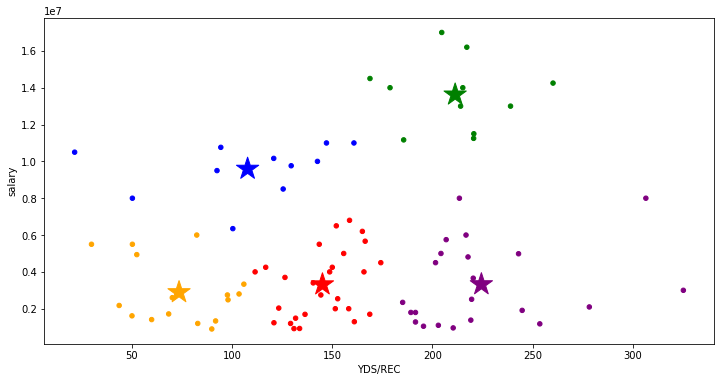

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
wrs['color'] = wrs['clusters'].map(lambda p: colors[p])

ax = wrs.plot(    
    kind = 'scatter', 
    x = 'YDS/REC', y = 'salary',
    figsize = (12,6),
    c = wrs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'YDS/REC', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

34.22590417997562

In [18]:
silhouette_score(X, km.labels_)

0.38704916237526554